# 4.  An√°lisis por objetivos (Objetivo Espec√≠fico 1)

An√°lisis Temporal (Objetivo Espec√≠fico 1): Describir la evoluci√≥n temporal de la cobertura, deserci√≥n, aprobaci√≥n y repitencia en la educaci√≥n preescolar, b√°sica y media en los municipios de Colombia entre 2011 y 2023.

## 4.1 Configuraci√≥n del Entorno e Importaci√≥n de M√≥dulos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os
  
sys.path.append(os.path.abspath(os.path.join('..', 'src'))),
sys.path.append(os.path.abspath(os.path.join('..', 'config'))),
   
# Importar funciones y variables desde tus m√≥dulos,
from data_loader import load_processed_data ,
# Importar funciones de visualizaci√≥n,
from visualizer import(
    plotly_time_series,
    plotly_subcategories_time_series,
    heatmap_sub_time_series,
    plot_yearly_boxplots,
    plot_heatmap_correlation,
    plot_distribution_comparison_two_years
) 
from utils import (
    temporal_statistics
)
from settings import (
    PROCESSED_DATA_PATH, 
    INDICADORES_ESTADISTICO, 
    FIGURES_PATH,
    INDICADORES_PLOTLY, 
    SUBCATEGORIAS_PLOTLY,
    INDICADORES_BOXPLOTS,
    TITULOS_BOXPLOTS 
)

## 4.2 Carga del Dataset Limpio

In [ ]:
# Cargar el dataset limpio 
df_cleaned = load_processed_data(PROCESSED_DATA_PATH)

if df_cleaned is not None:
    print("‚úÖ Datos limpios cargados exitosamente.\n")
    print(df_cleaned.head())
    print(f"Dimensiones del DataFrame limpio: {df_cleaned.shape}")
else:
    print("‚õî No se pudo cargar el DataFrame limpio.")

Intentando cargar los datos procesados desde: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\data\processed\datos_educacion_limpios.csv
Datos procesados cargados exitosamente. Dimensiones: (14582, 34)
‚úÖ Datos limpios cargados exitosamente.

   Unnamed: 0  anio  codigo_municipio   municipio  codigo_departamento  \
0           0  2023              5001    Medell√≠n                    5   
1           1  2023              5002   Abejorral                    5   
2           2  2023              5004    Abriaqu√≠                    5   
3           3  2023              5021  Alejandr√≠a                    5   
4           4  2023              5030       Amag√°                    5   

  departamento  codigo_etc              etc  poblacion_5_16  \
0    Antioquia      3759.0         Medell√≠n        377562.0   
1    Antioquia      3758.0  Antioquia (ETC)          3634.0   
2    Antioquia      3758.0  Antioquia (ETC)           503.0   
3    Antioquia      3758.0  Antio

### 4.3 Estad√≠sticas b√°sicas anuales

In [3]:
estadisticas_anuales = temporal_statistics(
    df_cleaned,
    INDICADORES_ESTADISTICO,
    grupo_temporal='anio' 
)

# Mostrar resultados
estadisticas_anuales.head(13)

‚úÖ Estad√≠sticas calculadas para 20/20 indicadores


anio  cobertura_neta_mean  cobertura_neta_median  cobertura_neta_std  \
0   2011            87.000624                 87.450           16.849926   
1   2012            85.585116                 86.400           17.025903   
2   2013            85.386453                 86.200           17.395132   
3   2014            86.777522                 87.425            4.929047   
4   2015            83.419492                 84.050           18.123789   
5   2016            83.543182                 82.750           22.651055   
6   2017            83.140722                 81.980           23.333339   
7   2018            88.121872                 89.170           14.657362   
8   2019            87.537638                 88.300           14.435617   
9   2020            86.371044                 86.980           14.558207   
10  2021            87.012756                 87.300           14.346948   
11  2022            85.622382                 85.750           15.235025   
12  2023            83.599197                 83.250           15.363757   

    cobertura_neta_primaria_mean  cobertura_neta_primaria_median  \
0                      86.970178                          87.900   
1                      85.079234                          86.250   
2                      83.932050                          84.450   
3                      77.387745                          78.480   
4                      81.019519                          82.225   
5                      81.217112                          80.460   
6                      80.043868                          78.450   
7                      85.608316                          86.660   
8                      84.547175                          85.155   
9                      82.932016                          83.460   
10                     83.218332                          83.210   
11                     82.152872                          82.250   
12                     80.088635                          80.130   

    cobertura_neta_primaria_std  cobertura_neta_secundaria_mean  \
0                     17.557144                       65.296533   
1                     17.810067                       65.625749   
2                     17.871325                       67.507736   
3                      8.449199                       68.365954   
4                     18.494704                       67.478004   
5                     22.778936                       68.637772   
6                     23.420520                       69.570508   
7                     14.567077                       73.149572   
8                     14.269902                       73.516551   
9                     14.200106                       73.822221   
10                    13.958339                       74.463595   
11                    14.648108                       72.508109   
12                    14.933771                       70.752676   

    cobertura_neta_secundaria_median  cobertura_neta_secundaria_std  ...  \
0                             67.100                      18.451098  ...   
1                             67.150                      18.928320  ...   
2                             68.900                      18.909304  ...   
3                             69.735                       9.088606  ...   
4                             68.810                      19.160355  ...   
5                             67.885                      22.183076  ...   
6                             69.085                      22.615400  ...   
7                             74.855                      17.901956  ...   
8                             74.900                      17.916682  ...   
9                             74.830                      17.390337  ...   
10                            74.960                      17.161749  ...   
11                            72.540                      17.402835  ...   
12                            71.080                      1

**1. Cobertura Neta**

| Aspecto       | Observaci√≥n                                                                                                                                     |
|---------------|-------------------------------------------------------------------------------------------------------------------------------------------------|
| *General*   | La cobertura neta es bastante alta en general, lo que indica que la mayor√≠a de ni√±os est√°n matriculados en el grado que les corresponde por edad. |
| *Tendencia* | Hay una ca√≠da notoria en 2015, lo que es preocupante.                                                                                           |
| *Niveles*   | - **Primaria**: Muestra una baja fuerte en 2014 (77.4%), posiblemente por un cambio en la forma de medici√≥n o un evento puntual. <br> - **Media**: Tiene un aumento an√≥malo en 2014, lo que sugiere irregularidades o alg√∫n ajuste. |
| *Desigualdad* | La alta desviaci√≥n est√°ndar indica que la cobertura no es homog√©nea y var√≠a mucho seg√∫n el municipio.                                          |


**2. Deserci√≥n Escolar**

| Aspecto     | Observaci√≥n|
|-------------|---------|
| *General* | La deserci√≥n tiende a disminuir entre 2011 y 2014, lo que es positivo, pero vuelve a aumentar levemente en 2015. |
| *Niveles* | Secundaria es el nivel con mayor deserci√≥n (4‚Äì5%), siendo el m√°s vulnerable. |
| *Preocupaci√≥n* | El repunte en 2015 puede estar relacionado con problemas en la calidad educativa o factores externos (econ√≥micos, sociales). |

**3. Aprobaci√≥n Escolar**

| Aspecto        | Observaci√≥n                                                                                                                                 |
|----------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| *General*     | La aprobaci√≥n es alta en general, con un pico en 2014, lo que muestra un buen desempe√±o en ese a√±o.                                       |
| *Niveles*     | Secundaria tiene la tasa de aprobaci√≥n m√°s baja y adem√°s sufri√≥ una ca√≠da en 2015, lo que coincide con el aumento en deserci√≥n.          |
| *Interpretaci√≥n* | El descenso en la aprobaci√≥n en 2015 puede ser un signo de deterioro en la calidad o en las condiciones de aprendizaje.                  |

**4. Repitencia Escolar**

| Aspecto     | Observaci√≥n                                                                                                                                  |
|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| *General*       | La repitencia ha ido aumentando constantemente, lo que indica que m√°s estudiantes est√°n qued√°ndose en el mismo grado.                         |
| *Niveles*       | Secundaria presenta el mayor aumento, con un pico en 2015.                                                                                     |
| *Preocupaci√≥n*  | La repitencia alta suele ser un indicador negativo, ya que puede desmotivar a los estudiantes y est√° relacionada con la deserci√≥n futura.     |

**5. Reprobaci√≥n Escolar**

| Aspecto | Observaci√≥n |
|-------------|-----------------|
| *General* | La reprobaci√≥n crece sobre todo en secundaria, alcanzando su nivel m√°s alto en 2015. |
| *Niveles* | La tasa en secundaria es casi el doble que en primaria y media, lo que refleja la mayor dificultad en ese nivel. |
| *Impacto* | La alta reprobaci√≥n explica en parte el aumento en la repitencia y, a largo plazo, podr√≠a aumentar la deserci√≥n. |

**Desviaci√≥n est√°ndar (std)**

- Los valores altos de std en indicadores como *cobertura, reprobaci√≥n y repitencia* muestran grandes desigualdades entre municipios.
Esto quiere decir que en ciertos municipios la situaci√≥n educativa es mucho m√°s precaria que en otros, lo que indica un problema de inequidad territorial.

### 4.4  Visualizaci√≥n de evoluci√≥n temporal (l√≠neas)

4.4.1 Evoluci√≥n promedio por indicador

In [4]:
plotly_time_series(
            df=estadisticas_anuales,
            time_col='anio',
            indicators=INDICADORES_PLOTLY,
            title='Evoluci√≥n temporal de indicadores educativos promedio por a√±o',
            yaxis_title='Valor Promedio',
            save_filename='evolucion_indicadores_plotly.html' # Se guardar√° en reports/figuras/
        )

‚úÖ Figura Plotly guardada como HTML en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\evolucion_indicadores_plotly.html


El gr√°fico muestra la evoluci√≥n temporal de indicadores educativos promedio entre 2011 y 2023 donde podemos destacar:

- **Estabilidad en cobertura y aprobaci√≥n:** La cobertura neta y la aprobaci√≥n han mantenido valores elevados y relativamente estables a lo largo de los a√±os, lo que sugiere una continuidad en el acceso y √©xito acad√©mico de los estudiantes.
- **Tendencias de deserci√≥n, repitencia y reprobaci√≥n:** Estos indicadores presentan valores bajos y estables, lo que podr√≠a reflejar esfuerzos en pol√≠ticas educativas para reducir el abandono escolar y mejorar la calidad de ense√±anza.
- **Comparaciones de trayectoria:** La aprobaci√≥n sigue una l√≠nea similar a la cobertura neta, indicando que los estudiantes que acceden a la educaci√≥n tienden a completar su ciclo con √©xito. Mientras tanto, la deserci√≥n, repitencia y reprobaci√≥n mantienen valores bajos sin grandes fluctuaciones.
- **Evaluaci√≥n de impacto en educaci√≥n:** Esta estabilidad en indicadores clave podr√≠a mostrar que las condiciones del sistema educativo han sido constantes en la √∫ltima d√©cada, aunque ser√≠a interesante analizar posibles influencias como cambios en pol√≠ticas gubernamentales, pandemias o reformas educativas.

### 4.4.2 Evoluci√≥n por nivel dentro de cada indicador (subcategor√≠as)

In [5]:
plotly_subcategories_time_series(
    df_cleaned,
    subcategories_dict=SUBCATEGORIAS_PLOTLY,
    time_col='anio',
    save_path_prefix=os.path.join(FIGURES_PATH, 'test_evolucion_nivel_')
)


 Generando gr√°ficos de evoluci√≥n temporal por subcategor√≠as (5 indicadores principales)...


‚úÖ Figura Plotly guardada como HTML en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\test_evolucion_nivel_cobertura_neta.html


‚úÖ Figura Plotly guardada como HTML en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\test_evolucion_nivel_desercion.html


‚úÖ Figura Plotly guardada como HTML en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\test_evolucion_nivel_aprobacion.html


‚úÖ Figura Plotly guardada como HTML en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\test_evolucion_nivel_repitencia.html


‚úÖ Figura Plotly guardada como HTML en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\test_evolucion_nivel_reprobacion.html


En t√©rminos generales, la interpretaci√≥n de las gr√°ficas revela lo siguiente sobre la evoluci√≥n del sistema educativo entre 2011 y 2023:
- **Cobertura:** La educaci√≥n primaria mantiene una cobertura muy alta y estable. La secundaria ha experimentado un crecimiento constante en su cobertura, mientras que la media (bachillerato) tambi√©n muestra una tendencia ascendente, aunque con un nivel de cobertura a√∫n inferior a los otros dos.
- **Deserci√≥n:** La tasa de abandono escolar es consistentemente baja en primaria. Sin embargo, es notablemente m√°s alta y vol√°til en secundaria y media, lo que indica un desaf√≠o significativo en la retenci√≥n de estudiantes en estos niveles, con picos preocupantes alrededor de 2020-2021.
- **Aprobaci√≥n:** La primaria registra tasas de aprobaci√≥n excepcionalmente altas. La secundaria muestra una tendencia a la baja en sus tasas de aprobaci√≥n en los √∫ltimos a√±os, lo cual es motivo de preocupaci√≥n. La media presenta tasas de aprobaci√≥n intermedias y m√°s estables que secundaria, aunque con un ligero descenso reciente.
- **Rendimiento (Repitencia y Reprobaci√≥n):**
La repitencia (repitici√≥n de a√±o) ha experimentado un aumento alarmante en todos los niveles a partir de 2020, siendo particularmente pronunciado en secundaria y primaria. Esto sugiere que m√°s estudiantes est√°n teniendo que repetir el mismo grado.
La reprobaci√≥n (p√©rdida de asignaturas o a√±o) tambi√©n muestra una tendencia creciente en secundaria, lo que indica dificultades en el aprendizaje. En primaria y media, aunque hubo picos de reprobaci√≥n alrededor de 2020, parecen haber disminuido ligeramente en los a√±os m√°s recientes.

En s√≠ntesis, el panorama general es el siguiente:

El sistema educativo ha logrado avances importantes en la ampliaci√≥n de la cobertura, especialmente en secundaria y media. Sin embargo, enfrenta desaf√≠os crecientes en la calidad y eficiencia interna, evidenciados por el *aumento de la deserci√≥n, repitencia y reprobaci√≥n, particularmente en los niveles superiores (secundaria y media)*.
Un punto cr√≠tico es el impacto notable de la pandemia de **COVID-19** a partir de 2020, que parece haber exacerbado o provocado un deterioro en los indicadores de rendimiento (aumento de repitencia y reprobaci√≥n) y en la retenci√≥n (aumento de deserci√≥n) en todos los niveles, aunque con una recuperaci√≥n parcial en algunos aspectos hacia 2023. La educaci√≥n secundaria emerge como el nivel con mayores retos en t√©rminos de retenci√≥n y resultados acad√©micos.
 

### 4.4.3 Mapa de calor para estad√≠sticas temporales


Generando heatmaps para subcategor√≠as de indicadores por anio...


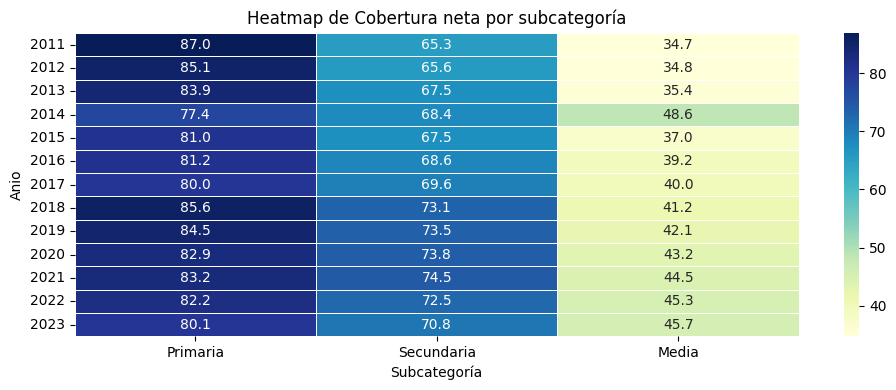

‚úÖ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\heatmap_cobertura_neta_por_nivel.png


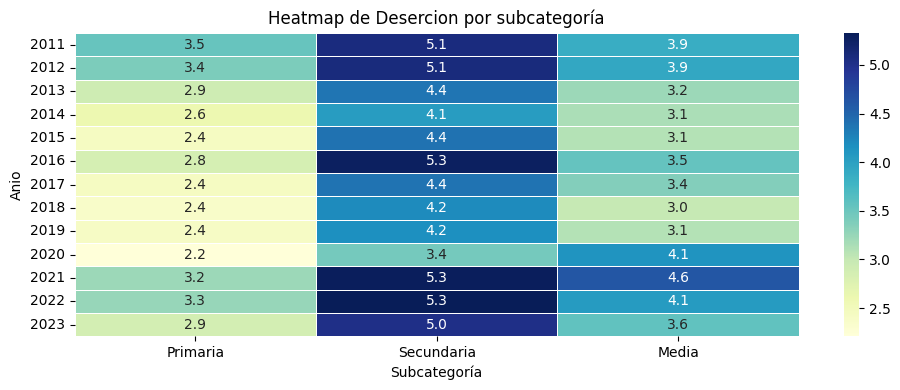

‚úÖ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\heatmap_desercion_por_nivel.png


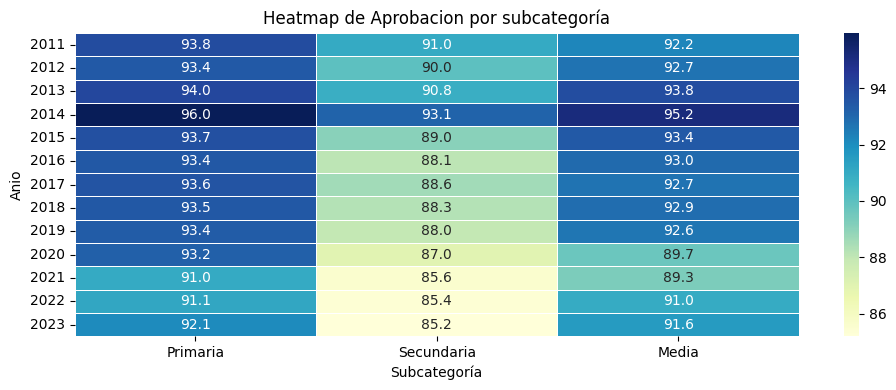

‚úÖ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\heatmap_aprobacion_por_nivel.png


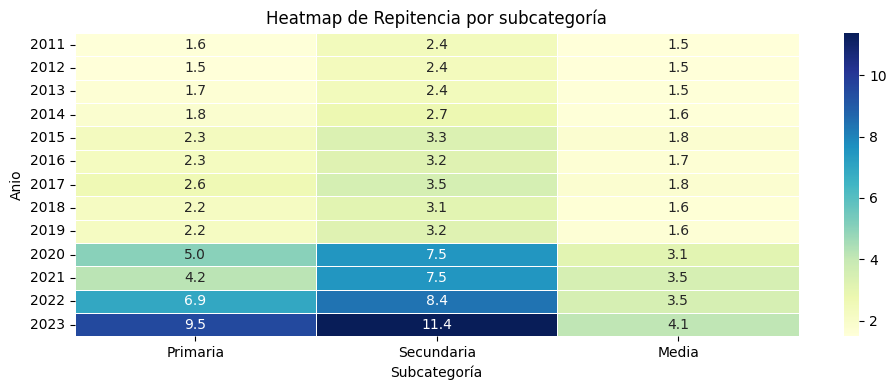

‚úÖ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\heatmap_repitencia_por_nivel.png


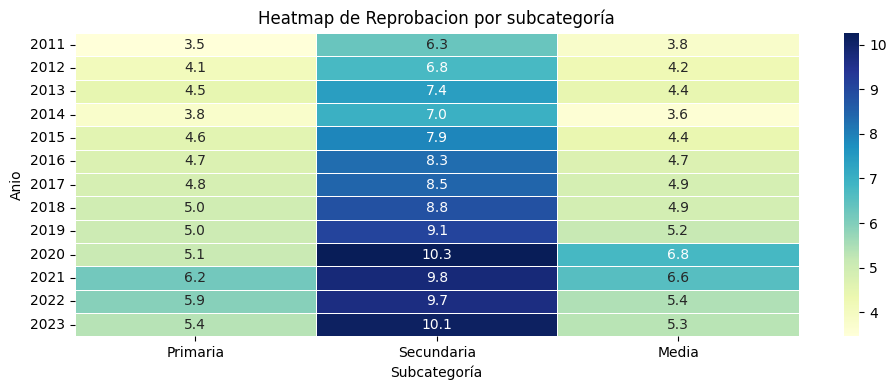

‚úÖ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\heatmap_reprobacion_por_nivel.png
‚úÖ Generaci√≥n de heatmaps de subcategor√≠as completada.


In [6]:
df_estadistica= df_cleaned.groupby('anio').mean(numeric_only=True).reset_index()
heatmap_sub_time_series(
        df=df_estadistica,
        subcategories_dict=SUBCATEGORIAS_PLOTLY,
        time_col='anio',
        save_path_prefix=FIGURES_PATH 
    )

Bas√°ndonos en las tablas de calor, la interpretaci√≥n general del sistema educativo entre 2011 y 2023 es la siguiente:

En t√©rminos de acceso (cobertura), el sistema ha logrado una penetraci√≥n muy alta en la educaci√≥n primaria, mientras que la secundaria y media han mostrado un progreso constante en la ampliaci√≥n de su cobertura, aunque la media sigue siendo el nivel con menor alcance.

Sin embargo, los indicadores de eficiencia interna y calidad revelan desaf√≠os importantes, especialmente a partir de 2020:
- La deserci√≥n escolar es m√≠nima en primaria, pero persiste como un problema considerable en la secundaria y media, lo que indica dificultades para retener a los estudiantes.
- En cuanto al rendimiento acad√©mico, la aprobaci√≥n se mantiene muy alta en primaria. No obstante, la secundaria experimenta un deterioro preocupante en sus tasas de aprobaci√≥n, mientras que la media, aunque tambi√©n afectada, muestra cierta resiliencia.
- El aspecto m√°s cr√≠tico es el aumento dr√°stico de la repitencia (repitici√≥n de a√±o) en todos los niveles educativos a partir de 2020, siendo particularmente alarmante en primaria y secundaria. Esto sugiere que un n√∫mero creciente de estudiantes no logra avanzar de grado satisfactoriamente.
- La reprobaci√≥n (p√©rdida de asignaturas o el a√±o) tambi√©n es una preocupaci√≥n constante y creciente en la secundaria, aunque en primaria y media, tras un aumento en 2020, se observa una ligera tendencia a la estabilizaci√≥n o disminuci√≥n en los a√±os m√°s recientes.

Se interpreta entonces, que el sistema educativo colombiano ha expandido su alcance, pero enfrenta serios retos en la calidad y el progreso estudiantil, especialmente acentuados despu√©s de 2020, probablemente debido al impacto de la pandemia. La educaci√≥n secundaria emerge como el nivel con los mayores problemas de retenci√≥n y rendimiento, mientras que el aumento de la repitencia a nivel general es un indicador clave de dificultades en el aprendizaje o la progresi√≥n de los estudiantes.

### 4.4.4 Boxplot para indicadores


Generando boxplots anuales para 5 indicadores...


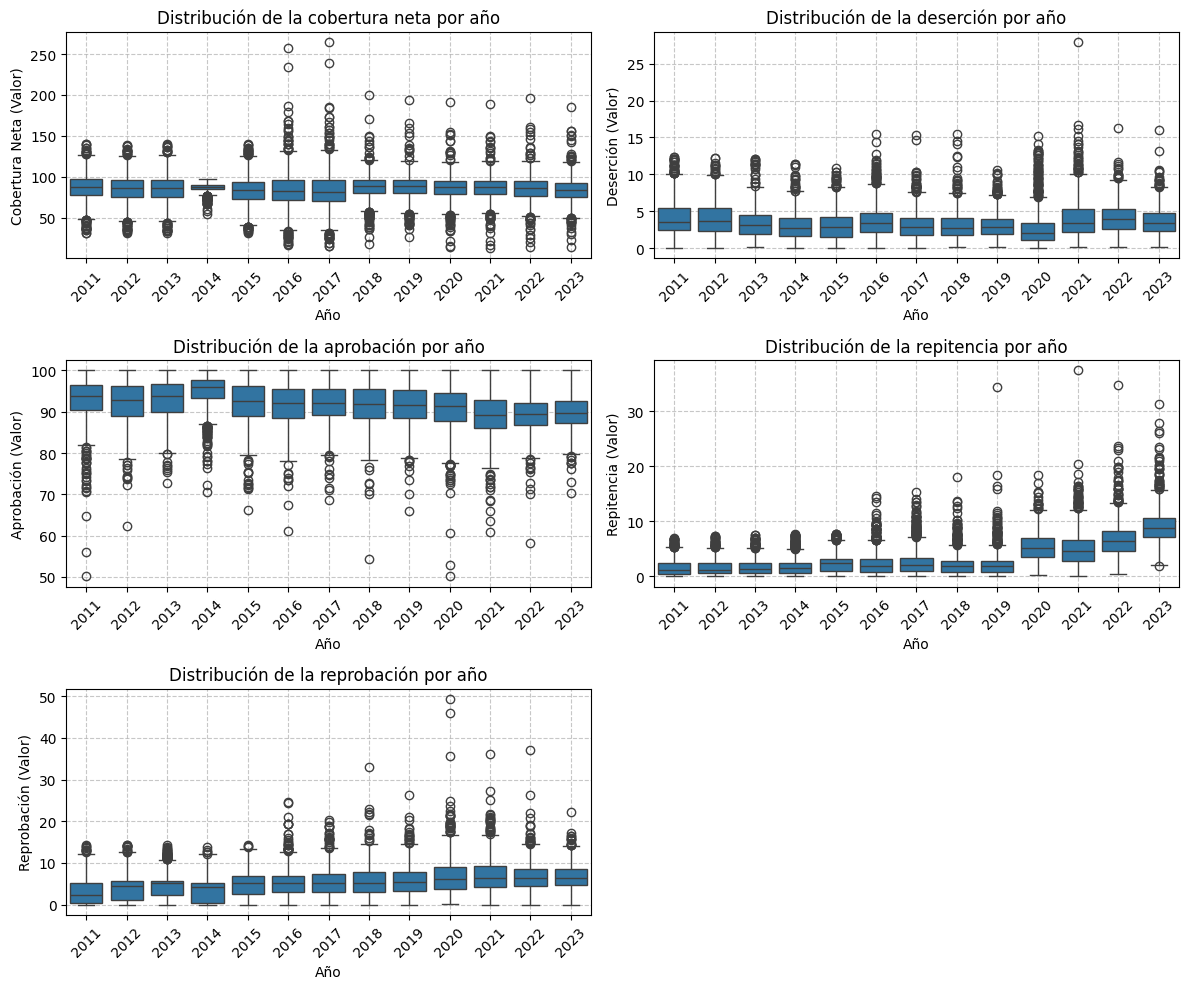

‚úÖ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\boxplots_distribucion_anual.png
‚úÖ Generaci√≥n de boxplots anuales completada.


In [7]:
plot_yearly_boxplots(
        df=df_cleaned,
        indicators=INDICADORES_BOXPLOTS,
        titles_dict=TITULOS_BOXPLOTS,
        time_col='anio',
        save_filename='boxplots_distribucion_anual.png'
    )

üìä **1. Variabilidad en los indicadores**
- Cobertura neta: Se mantiene relativamente estable en la mediana, pero con cierta dispersi√≥n en los extremos. Municipios con menor cobertura pueden estar afectando la distribuci√≥n.
- Deserci√≥n: Disminuye ligeramente con el tiempo, lo cual es una se√±al positiva. Sin embargo, algunos municipios presentan valores muy elevados.
- Aprobaci√≥n: Se observa una mediana alta y estable, pero con presencia de valores at√≠picos en ciertos a√±os que podr√≠an indicar municipios con problemas espec√≠ficos.

üö® **2. Identificaci√≥n de valores extremos**
- Repitencia y reprobaci√≥n: Tienen variabilidad significativa, con algunos municipios mostrando tasas muy altas en ciertos a√±os. Esto podr√≠a indicar zonas con desaf√≠os estructurales en educaci√≥n, como falta de recursos o problemas en el sistema de evaluaci√≥n.

üîç **3. Tendencias en el tiempo**
- La mayor√≠a de los indicadores se mantienen estables, pero los valores extremos sugieren la existencia de municipios que requieren intervenciones educativas espec√≠ficas.
- La deserci√≥n muestra una leve reducci√≥n, lo que podr√≠a reflejar mejoras en pol√≠ticas de retenci√≥n escolar.

### 4.4.5 Matriz correlaci√≥n Spearman (Mapa de calor)


Calculando y generando heatmap de correlaci√≥n para 5 indicadores...


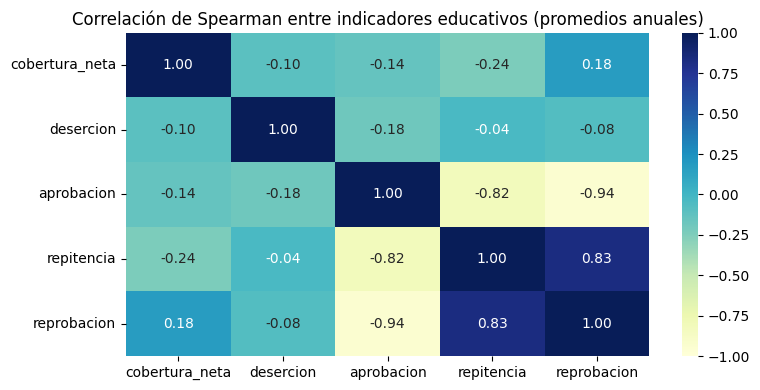

‚úÖ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\heatmap_correlacion_sperman.png
Generaci√≥n de heatmap de correlaci√≥n completada.


In [8]:
plot_heatmap_correlation(
        df=df_cleaned,
        indicators=INDICADORES_BOXPLOTS,
        time_col='anio',
        title='Correlaci√≥n de Spearman entre indicadores educativos (promedios anuales)',
        save_filename='heatmap_correlacion_sperman.png'
    )

üîç Relaciones destacadas
1. Aprobaci√≥n vs. Reprobaci√≥n y Repitencia
- Existe una correlaci√≥n negativa fuerte entre aprobaci√≥n y reprobaci√≥n (-0.94) y entre aprobaci√≥n y repitencia (-0.82).
- Esto significa que en los municipios donde la tasa de aprobaci√≥n es m√°s alta, los niveles de reprobaci√≥n y repitencia son significativamente m√°s bajos.
- Es un hallazgo esperado: si m√°s estudiantes aprueban, menos necesitan repetir o reprobar.
2. Repitencia y Reprobaci√≥n est√°n estrechamente relacionadas
- Su correlaci√≥n positiva alta (0.83) sugiere que los municipios donde hay m√°s estudiantes repitiendo el curso, tambi√©n tienen m√°s estudiantes reprobando.
- Esto podr√≠a indicar deficiencias en el sistema de apoyo para los estudiantes en riesgo.
3. Cobertura vs. Otros Indicadores
- Cobertura neta tiene correlaciones relativamente d√©biles con los dem√°s indicadores (-0.09 con deserci√≥n, -0.09 con aprobaci√≥n, -0.28 con repitencia y +0.11 con reprobaci√≥n).
- Esto sugiere que la cobertura educativa no tiene un impacto fuerte en la probabilidad de aprobaci√≥n, repitencia o deserci√≥n.
- Es posible que otros factores como calidad educativa, recursos o condiciones socioecon√≥micas tengan m√°s peso.
4. Deserci√≥n y Aprobaci√≥n
- La correlaci√≥n negativa (-0.18) entre deserci√≥n y aprobaci√≥n indica que los municipios con m√°s deserci√≥n suelen tener menos estudiantes aprobando.
- Aunque no es una relaci√≥n fuerte, sugiere que mejorar los niveles de aprobaci√≥n podr√≠a ayudar a reducir la deserci√≥n.


### 4.4.6 Distribuci√≥n densidad entre 2020 y 2023


Generando gr√°ficos de distribuci√≥n comparativos para 5 indicadores entre 2020 y 2023...


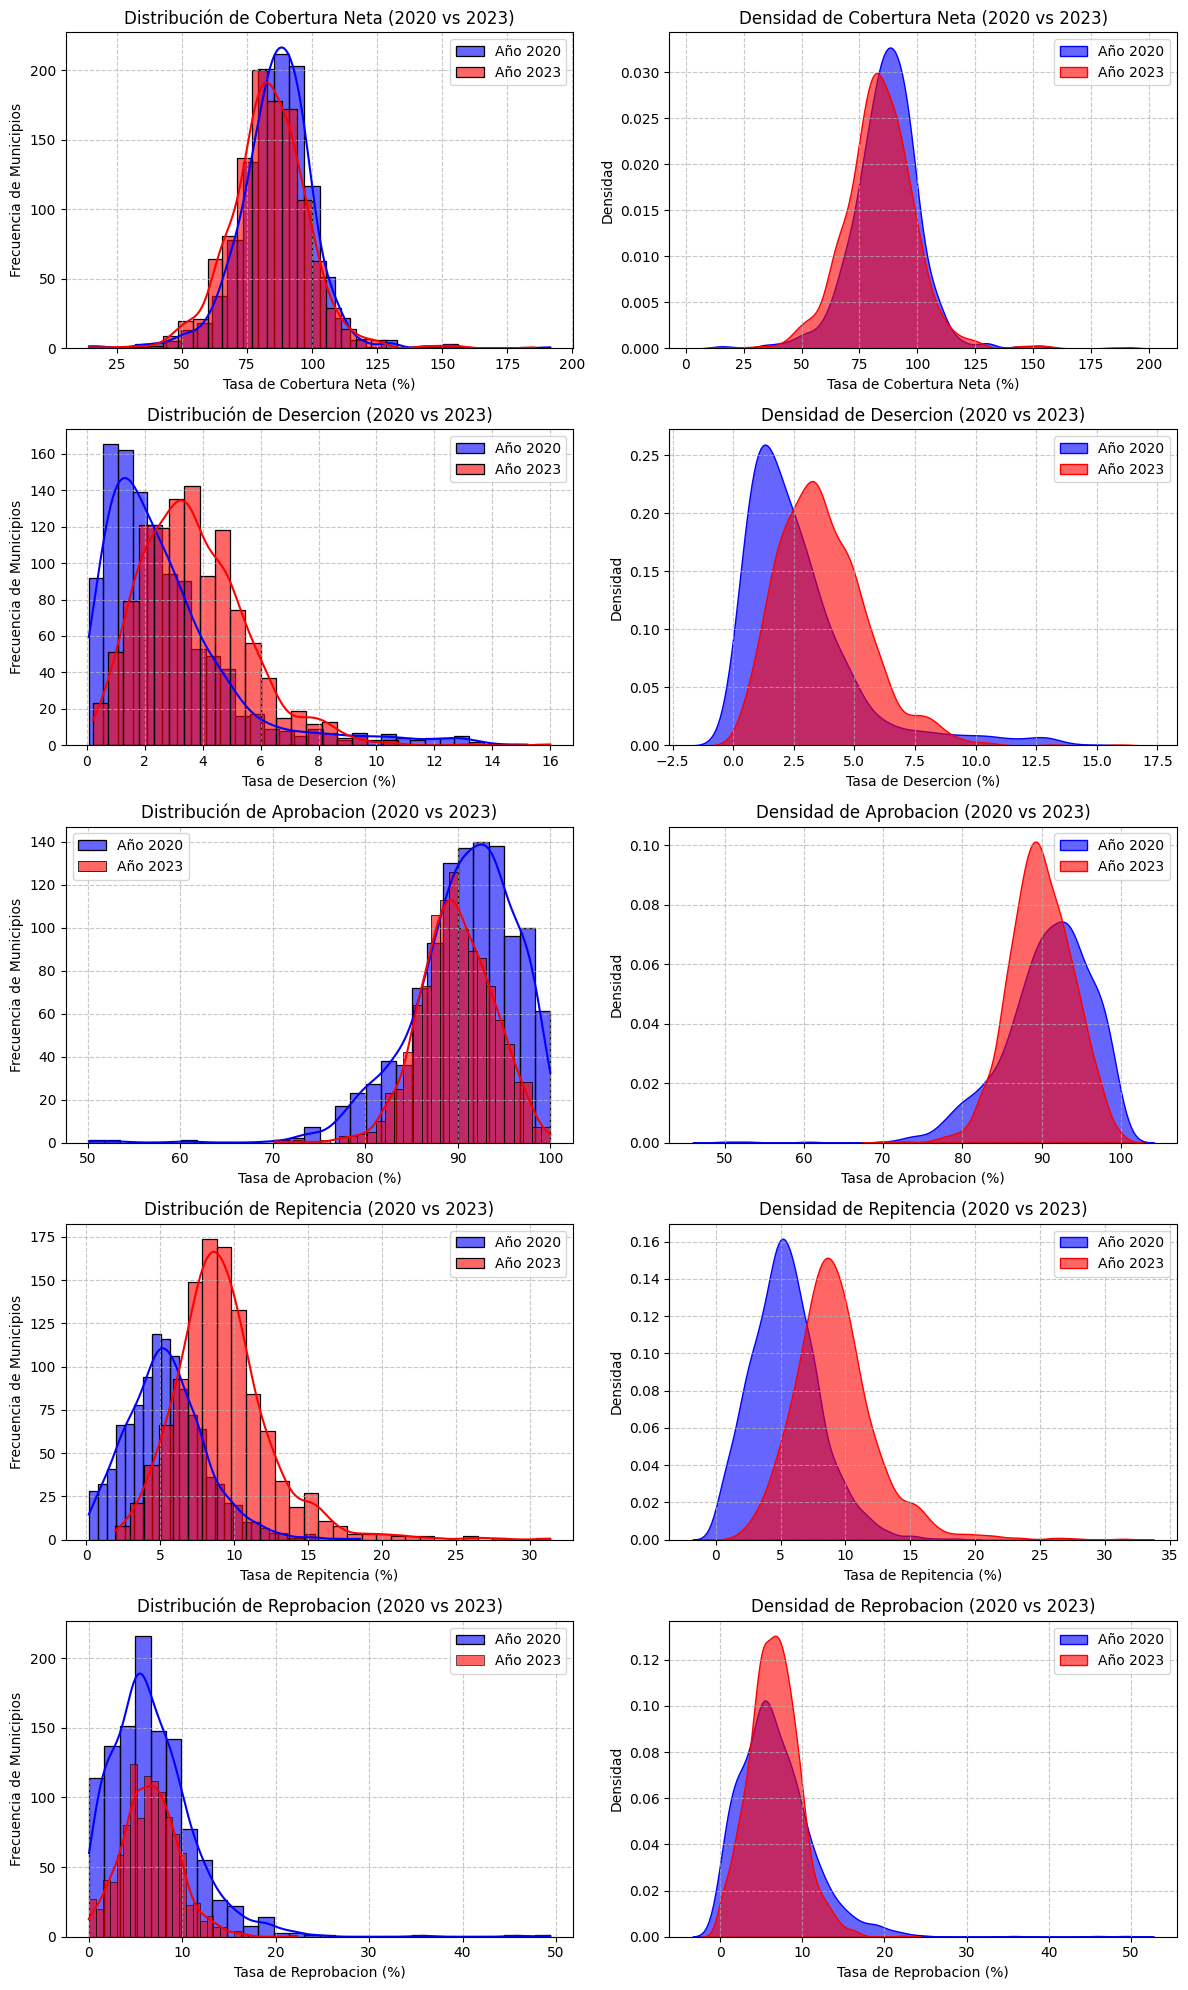

‚úÖ Figura guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\distribucion_comparativa_2011_2023.png
‚úÖ Generaci√≥n de gr√°ficos de distribuci√≥n comparativos completada.


In [9]:
plot_distribution_comparison_two_years(
        df=df_cleaned, 
        indicators=INDICADORES_BOXPLOTS,
        year_start=2020,
        year_end=2023,
        save_filename='distribucion_comparativa_2011_2023.png'
    )

Las gr√°ficas de distribuci√≥n y densidad confirman y detallan las tendencias observadas en la l√≠nea de tiempo. Muestran que los impactos de la pandemia (que inici√≥ en 2020 y se extendi√≥ hasta 2023) se manifestaron a nivel municipal principalmente en un aumento generalizado en la repitencia y reprobaci√≥n, y una ligera disminuci√≥n en la cobertura neta. La deserci√≥n, aunque con un leve aumento, mantuvo una distribuci√≥n m√°s concentrada en valores bajos. Esto refuerza la idea de que la crisis sanitaria gener√≥ brechas en el aprendizaje y la progresi√≥n acad√©mica.